In [46]:
#Import libraries
from numpy import *
from scipy.sparse import diags
from scipy.integrate import odeint
from matplotlib import animation as animation
from matplotlib import pyplot 
from matplotlib import *
import matplotlib.colors as colors
from pylab import *
from itertools import *

#plot inline
%matplotlib inline

In [47]:
#------------------------------------------------------------------------
#                        TIME AND SPACE ARRAYS
#------------------------------------------------------------------------
#end of time and space arrays
T=150
R=350

#size of the arrays
m=500                #time

n=500                #space       


#time array
t=linspace(0,T,m,endpoint=True)

#space array
x=linspace(0,R,n,endpoint=True)

dt=t[1]-t[0]
dx=x[1]-x[0]


In [48]:
#-------------------------------------------------------------------------
#                       VECTOR FIELD FOR THE SYSTEM
#-------------------------------------------------------------------------
# INPUTS
#  CN: array of (1,2*n) with the values for C and N
#  t: time array
#  n: size of the space array
#  D: difussion coefficient
# OUTPUT
#  CN: array with the value of the system at C and N

def field(CN,t,n,D):
    c=CN[0:n]
    n=CN[n:2*n]
    
    dc=c*(1-c-gama*n)-lamda*c*(1-K*n)
    dn=lamda*c*(1-K*n)
    
    if not D==0:
        dc+=D*dot(L,transpose(c))
    
    CN=[]
    
    CN.extend(dc)
    CN.extend(dn)
    
    return CN

In [4]:
#Initial conditions for C and N
def initCN(x,t):   
    #Initial conditions
    C=array([1 if k<100 else 0 for k in x])
    N=array([0 for k in x ])
    
    return C,N

In [5]:
#Constructs sparse matrix
def discretizationMatrix(dx,m,n):
    diagonals=[]
    
    diagonals.append(ones((1,n))[0]*(-2/pow(dx,2)))
    diagonals.append((ones((1,n-1))[0])*(1/pow(dx,2)))
    diagonals.append((ones((1,n-1))[0])*(1/pow(dx,2)))
    diagonals.append(zeros((1,n-2))[0])
    diagonals.append(zeros((1,n-2))[0])
    
    diagonals[2][n-2]=2/pow(dx,2)
    diagonals[2][n-2]=2/pow(dx,2)
    
    L=diags(diagonals,[0,-1,1,2,-2])*eye(n)
    
    return L

In [6]:
def solveODE(n,t,D):
    
    sol=odeint(field,CN,t,args=(n,D))
    
    C_sol=sol[:,0:n]
    N_sol=sol[:,n:2*n]
    
    return [C_sol,N_sol]

In [7]:
[C,N]=initCN(x,t)
L=discretizationMatrix(dx,m,n)
CN=[C[i] if i<n else N[i-n] for i in range(2*n)]

In [9]:
lamda=0.1
K=3
gama=0

CN_sol=solveODE(n,t,1)
C_sol=CN_sol[0]
N_sol=CN_sol[1]

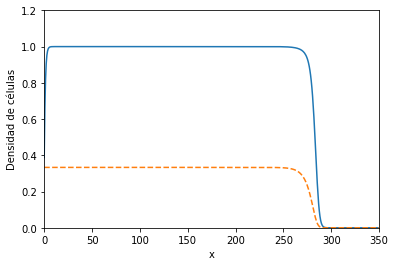

In [10]:
fig=plt.figure()
xlim(0,350)
ylim(0,1.2)
xlabel('x')
ylabel('Densidad de células')
plot(x,C_sol[333],x,N_sol[333],'--')
savefig('./images/')

### γ = 0

In [11]:
gama=0

In [12]:
colors

<function matplotlib.pyplot.colors>

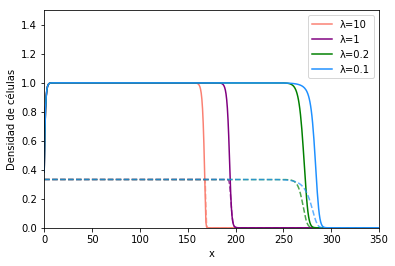

In [44]:
#------------------------------------------------------------------------
#                    PLOT FOR DIFFERENT LAMBDAS
#------------------------------------------------------------------------
lamdas=[10,1,0.2,0.1]
clrs=['salmon','purple','g','dodgerblue']
K=3


fig5=figure()
xlim(0,350)
ylim(0,1.5)
xlabel("x")
ylabel("Densidad de células")

for (l,c) in zip(lamdas,clrs):
    lamda=l
    CN_sol=solveODE(n,t,1)
    
    dc_sol=CN_sol[0]
    dn_sol=CN_sol[1]
    
    plot(x,dc_sol[333],c,alpha=1,label='λ='+str(l))
    plot(x,dn_sol[333],c,linestyle='--',alpha=0.7)
    
legend(loc='best')
#savefig('./images/lambdas_0.eps',format='eps',dpi=900)

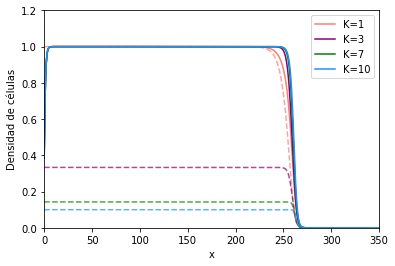

In [43]:
#------------------------------------------------------------------------
#                    PLOT FOR DIFFERENT K's
#------------------------------------------------------------------------
ks=[1,3,7,10]
clrs=['salmon','purple','g','dodgerblue']

lamda=0.3

fig6=figure()
xlim(0,350)
ylim(0,1.2)
xlabel("x")
ylabel("Densidad de células")

for (k_i,c) in zip(ks,clrs):
    K=k_i
    
    CN_sol=solveODE(n,t,1)
    
    dc_sol=CN_sol[0]
    dn_sol=CN_sol[1]
    
    plot(x,dc_sol[333],c,alpha=1,label='K='+str(k_i))
    plot(x,dn_sol[333],c,linestyle='--',alpha=0.7)
    
legend(loc='best')
#savefig('./images/ks_0.eps',format='eps',dpi=900)

### γ = 1

In [ ]:
gama=1

In [ ]:
#------------------------------------------------------------------------
#                    PLOT FOR DIFFERENT LAMBDAS
#------------------------------------------------------------------------
lamdas=[10,1,0.2,0.1]
colors=['r','b','g','m']
K=3

fig5=figure()
xlim(0,350)
ylim(0,1.5)
xlabel("x")
ylabel("Densidad de células")

for (l,c) in zip(lamdas,colors):
    lamda=l
    CN_sol=solveODE(n,t,1)
    
    dc_sol=CN_sol[0]
    dn_sol=CN_sol[1]
    
    plot(x,dc_sol[333],color=c,alpha=0.8,label='λ='+str(l))
    plot(x,dn_sol[333],c+'--',alpha=0.7)
    
legend(loc='best')
#savefig('./images/lamdas_1.eps',format='eps',dpi=900)

In [ ]:
#------------------------------------------------------------------------
#                    PLOT FOR DIFFERENT K's
#------------------------------------------------------------------------
ks=[1,3,7,10]
colors=['r','b','g','m']
lamda=0.3

fig6=figure()
xlim(0,350)
ylim(0,1.5)
xlabel("x")
ylabel("Densidad de células")

for (k_i,c) in zip(ks,colors):
    K=k_i
    
    CN_sol=solveODE(n,t,1)
    
    dc_sol=CN_sol[0]
    dn_sol=CN_sol[1]
    
    plot(x,dc_sol[333],color=c,alpha=0.8,label='K='+str(k_i))
    plot(x,dn_sol[333],c+'--',alpha=0.7)
    
legend(loc='best')
#savefig('./images/ks_1.eps',format='eps',dpi=900)

# Without diffusion
We'll see how the system behaves in time

In [ ]:
# Generate initial conditons near a steady state
#
#INPUTS
#  xstar: steady state
#  eps: variation
#  n: number of initial conditions 
def init_cond(xstar,eps,n):
    xinit = xstar + eps*rand(n,2)
    
    return xinit

In [45]:
gama=0
lamda=0.1
K=3

num_ini=2
eps   = 0.03
#xstar = [1-1/K,1/K]
xstar = [0,0]
init_states=init_cond(xstar,eps,num_ini)

#plot time dynamics
fig5=figure()
xlabel("t",fontsize=13)
ylabel("c,n",fontsize=13)
xlim(0,150)
ylim(0,1.1)

for xi in init_states :
    sol=odeint(field,xi,t,args=(1,0))
    plot(t,sol[:,0])
    plot(t,sol[:,1],'--')

grid(linestyle='..',linewidth=0.5)
title('Dinámica en el tiempo',fontsize=14)
#savefig('./images/cn_vs_t.eps',format='eps',dpi=900)


#plot phase space
fig5=figure()
xlabel("t",fontsize=13)
ylabel("c,n",fontsize=13)

for xi in init_states :
    sol=odeint(field,xi,t,args=(1,0))
    plot(sol[:,0],sol[:,1])
    plot(xi[0],xi[1],"black",marker='o',markersize=5.0)
    plot(sol[-1,0],sol[-1,1],"black",marker='D',markersize=5.0)
    
grid(linestyle='--',linewidth=0.5)
title('Espacio fase',fontsize=14)
#savefig('./images/cn_vs_t.eps',format='eps',dpi=900)

NameError: name 'init_cond' is not defined